In [10]:
import numpy as np
import random
import matplotlib.pyplot as plt
from hmmlearn import hmm
import sys
import warnings
import powerlaw
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [24]:
A = np.array([[0.99, 0.01, 0, 0],
              [0.01, 0.9899, 0, 0.0001],
              [0, 0, 0.999, 0.001],
              [0, 0.0001, 0.001, 0.9989]]);

A1 = np.array([[0.497, 0.003, 0.497, 0.003],
              [0.003, 0.497, 0.003, 0.497],
              [0.497, 0.003, 0.497, 0.003],
              [0.003, 0.497, 0.003, 0.497]]);

B = np.array([[1, 0],
              [0, 1],
              [1, 0],
              [0, 1,]]);


In [39]:
# T is Transition matrix & E is emission matrix 
def Generatedata(T, E, number_observations):
    # we initialize and empty list in order to store our sequence of observations
    Observations = [];
    #We will also store transitions from on -> off and vice-versa
    switch = [];
    # we initialize the time spent in the initial state as 1 time step
    time_in_state =1;
    State = 0;
    Prob_nextstate = 0;
    Prob_currentobs =0;
    # First we choose an observation given that we are in state 0
    current_observation = random.uniform(0, 1);
    for o_state in range(0, E.shape[1]):
        Prob_currentobs = Prob_currentobs + E[State, o_state]
        #Prob_currentobs = 0;
        if current_observation <= Prob_currentobs:
            Observations.append(o_state)
            Prob_currentobs = 0;
            break
    # after appending the first observation we choose the next state
    for time_step in range(0, number_observations-1):
        next_state = random.uniform(0, 1);
        #Prob_nextstate =0;
        for i_next_state in range(0,T.shape[1]):
            Prob_nextstate = Prob_nextstate + T[State, i_next_state];
            if next_state <= Prob_nextstate:
                State = i_next_state;
                Prob_nextstate =0;
                # we have chosen the next state so we choose and observation and append it to our list
                current_observation = random.uniform(0, 1);
                for o_current_observation in range(0, E.shape[1]):
                    Prob_currentobs = Prob_currentobs + E[State, o_current_observation]
                    # Prob_currentobs = 0;
                    if current_observation <= Prob_currentobs:
                        # We check to see if we emit the same observation state as the last time step
                        # If the observation is the same then we add 1 to time_in_state
                        if o_current_observation == Observations[time_step]:
                            time_in_state += 1
                        # If we emit a new observation we first append the amount of steps spent emiting the previous observation
                        # We then reset time_in_state to 1
                        else:
                            switch.append(time_in_state)
                            time_in_state = 1
                        Observations.append(o_current_observation)
                        Prob_currentobs = 0;
                        break
                break
    switch.append(time_in_state)
    return [Observations,switch]

# We now plot a histogram of the switch

## since we only have 2 observable states and we start in the on state we can separate the consecutive times spent in either on or off by splitting (switch) into two separate lists

In [40]:
Q = Generatedata(A, B, 1000000)
sw = Q[1]
on =[];
off = [];
for i in range(0, len(sw)):
    if i%2 > 0:
        off.append(sw[i])
    else:
        on.append(sw[i])

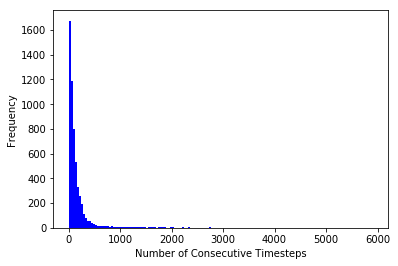

In [41]:
plt.hist(sw, bins = 150, color = 'b')
plt.xlabel('Number of Consecutive Timesteps')
plt.ylabel('Frequency')
plt.show()

## below we just compute some statistical measurements to make sense of the distribution

In [29]:
np.mean(sw)

171.82130584192439

In [18]:
hm = np.log(sw)
print(np.mean(hm))
print(np.std(hm))

print(np.exp(np.mean(hm) + (np.std(hm)**2)/2 ))
print((np.exp((np.std(hm)**2))-1)*np.exp(2*np.mean(hm)+ (np.std(hm)**2) ))

4.2510172389562655
1.3672371160554306
178.69597617710775
175116.4130394513


In [19]:
print(np.var(sw))
print(np.mean(sw))

131400.39143609547
171.82130584192439


In [49]:
print(np.var(on))
print(np.mean(on))

159873.35861032334
178.9355528066118


In [50]:
print(np.var(off))
print(np.mean(off))

149819.85049542514
179.62297145151922


## We do the same thing as above, however; instead of using the actual transition matrix (A) we use a transition matrix that hmm.learn decided was a viable transition matrx for explaining the sequence generated above (A1)

In [34]:
Q1 = Generatedata(A1, B, 10000000)
sw1 = Q1[1]
on1 =[];
off1 = [];
for i in range(0, len(sw1)):
    if i%2 > 0:
        off1.append(sw1[i])
    else:
        on1.append(sw1[i])

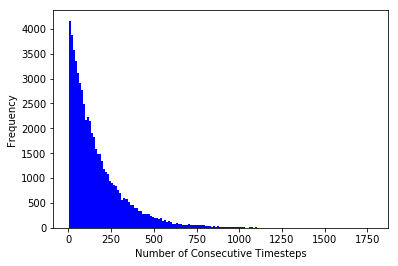

In [35]:
plt.hist(sw1, bins = 150, color = 'b')
plt.xlabel('Number of Consecutive Timesteps')
plt.ylabel('Frequency')
plt.show()

In [36]:
np.mean(sw1)

166.6472244904761

In [37]:
np.var(sw1)

27644.12287058575

In [38]:
Output

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [30]:
Output = [];
for i in range(0,len(Q[0])):
    Output.append([Q[0][i]])
Output = np.asarray(Output)   

In [15]:
Output

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [31]:
learnmodel = hmm.MultinomialHMM(n_components=4, n_iter = 1000, init_params = "st", params = "st")
learnmodel.emissionprob_ = B
learnmodel.fit(Output, lengths=None)

MultinomialHMM(algorithm='viterbi', init_params='st', n_components=4,
        n_iter=1000, params='st',
        random_state=<mtrand.RandomState object at 0x000001AE2FDE3CF0>,
        startprob_prior=1.0, tol=0.01, transmat_prior=1.0, verbose=False)

In [32]:
learnmodel.transmat_

array([[0.49701801, 0.00298199, 0.49701801, 0.00298199],
       [0.00284043, 0.49715957, 0.00284043, 0.49715957],
       [0.49701801, 0.00298199, 0.49701801, 0.00298199],
       [0.00284043, 0.49715957, 0.00284043, 0.49715957]])

In [19]:
Q2 = Generatedata(A2, B, 10000000)
sw2 = Q2[1]
on2 =[];
off2 = [];
for i in range(0, len(sw2)):
    if i%2 > 0:
        off2.append(sw2[i])
    else:
        on2.append(sw2[i])

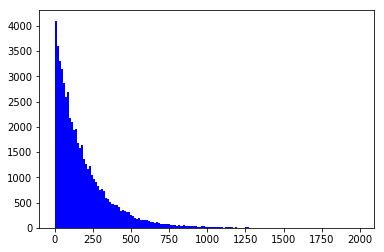

In [20]:
plt.hist(sw2, bins = 150, color = 'b')
plt.show()

In [21]:
p2 = 1/np.mean(sw2)

In [22]:
(1-p2)/(p2**2)

32843.68935522825

In [23]:
print(np.var(sw2))
print(np.mean(sw2))

32827.85708560989
181.72896941501446


# below we check if the distribution for T=A is a power law

### It is not a power law

In [42]:
results = powerlaw.Fit(np.asarray(Q[1]), xmin=136, discrete=True)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

2.2411820405473595
136.0


In [43]:
R

-265.18326612622513

In [44]:
p

1.937256051664321e-64

## We bias hmm.learn with random transition matrices to see the landscape of transition matrices that can explain a given sequence of observations

In [9]:
transition_m = [];
for i in range(0, 100):
    matrix = np.random.rand(4,4)
    matrix = matrix/matrix.sum(axis=1)[:, None]
    lalearnmodel = hmm.MultinomialHMM(n_components=4, n_iter = 150, init_params = "s", params = "st")
    lalearnmodel.transmat_ = matrix
    lalearnmodel.emissionprob_ = B
    lalearnmodel.fit(Output, lengths=None)
    transition_m.append(lalearnmodel.transmat_)

KeyboardInterrupt: 

In [15]:
transition_m

[array([[8.25054975e-01, 6.50938410e-04, 1.70639991e-01, 3.65409614e-03],
        [1.76675887e-03, 2.55360081e-01, 8.65365346e-04, 7.42007794e-01],
        [8.59437547e-01, 8.33971647e-04, 1.29993849e-01, 9.73463174e-03],
        [1.88895713e-04, 8.48759651e-01, 8.06071387e-03, 1.42990739e-01]]),
 array([[7.52243388e-01, 2.21130973e-03, 2.45274987e-01, 2.70315650e-04],
        [2.98516868e-03, 1.25514677e-01, 1.18471175e-02, 8.59653037e-01],
        [3.73688325e-01, 3.39881456e-03, 6.16583398e-01, 6.32946267e-03],
        [3.86112930e-04, 3.06084210e-01, 1.47762647e-03, 6.92052050e-01]]),
 array([[4.20072897e-01, 5.38990827e-03, 5.71971881e-01, 2.56531344e-03],
        [1.70266865e-03, 7.05707888e-01, 4.88587106e-04, 2.92100857e-01],
        [4.38847535e-01, 8.08930385e-04, 5.57792840e-01, 2.55069553e-03],
        [1.01722063e-02, 7.39877146e-01, 2.88668006e-03, 2.47063968e-01]]),
 array([[3.11916477e-01, 5.31959253e-03, 6.77770157e-01, 4.99377403e-03],
        [1.01495460e-02, 2.26288